In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 앞으로 해야 할 과정

1. 데이터셋 확인

2. 탐색적 데이터 분석(exploratory data analysis)

3. feature engineering

4. 모델 만들기

5. 모델 학습 및 예측

6. 모델 평가

# 1. Dataset 확인

- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰는 라이브러리는 pandas 이다.

- pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다.

- 데이터 과학 대회에서 데이터셋은 보통 train set, test set으로 나뉘어 있다.

In [5]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [10]:
df_train.head()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0


- 여기서 다루는 문제에서 feature는 u, g, r, i, z ,redshift, dered_u, dered_g, dered_r, dered_i, dered_z, nObserve, nDetect ,airmass_u, airmass_g, airmass_r, airmass_i, airmass_z 이다.

- 그리고 예측하려는 target label은 class 이다.

- 변수에 대한 자세한 설명은 해당 링크 (http://sdss.china-vo.org/skyserver/en/help/docs/QS_UserGuide.aspx) 참고

|변수(feature variable)|정의|설명|타입|
|:--:|:--:|:--:|:--:|
|u|자외선|continuous|float|
|g|가시광선(초록)|continuous|float|
|r|가시광선(빨강)|continuous|float|
|i|근 적외선|continuous|float|
|z|적외선|continuous|float|
|redshift|적색편이|continuous|float|
|dered_u|천체의 광도(자외선에 해당하는)|continuous|float|
|dered_g|천체의 광도(가시광선 초록에 해당하는)|continuous|float|
|dered_r|천체의 광도(가시광선 빨강에 해당하는)|continuous|float|
|dered_i|천체의 광도(근 적외선에 해당하는)|continuous|float|
|dered_z|천체의 광도(적외선에 해당하는)|continuous|float|
|nObserve|관측된수|discrete|int|
|nDetect|탐지된수|discrete|int|
|airmass_u|u-band 관측시 공기질량|continuous|float|
|airmass_g|g-band 관측시 공기질량|continuous|float|
|airmass_r|r-band 관측시 공기질량|continuous|float|
|airmass_i|i-band 관측시 공기질량|continuous|float|
|airmass_z|z-band 관측시 공기질량|continuous|float|

- pandas dataframe 에는 describe() 메소드가 있는 데, 이를 쓰면 각 feature 가 가진 통계치들을 반환해줍니다.

In [18]:
df_train.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,159999.500000,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,92376.187408,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,0.000000,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,79999.750000,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,159999.500000,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,239999.250000,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,319999.000000,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


In [19]:
df_test.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,359999.500000,19.859840,18.437104,17.739743,17.306491,17.148951,0.060083,19.634952,18.263779,17.619340,17.217804,16.870231,6.349950,6.15775,1.175956,1.176733,1.175311,1.175616,1.176326
std,23094.155105,1.954254,1.702973,1.478590,1.320742,24.643062,0.346845,1.921030,1.665741,1.476002,1.332361,35.436707,8.872794,8.55086,0.116424,0.118197,0.114845,0.115609,0.117285
min,320000.000000,-0.338524,-51.175280,-5.438650,5.326743,-39.527151,-30.148965,-30.633700,-18.655990,-8.756023,-3.697258,-9999.000000,1.000000,1.00000,1.000143,1.000086,1.000177,1.000150,1.000148
25%,339999.750000,18.727258,17.477982,16.881969,16.525463,16.288210,0.000034,18.570860,17.352245,16.790630,16.456230,16.230968,1.000000,1.00000,1.088091,1.088294,1.087693,1.087911,1.088175
50%,359999.500000,19.426062,18.145087,17.529944,17.155994,16.921198,0.047115,19.267415,18.024665,17.448660,17.091210,16.873305,2.000000,2.00000,1.179353,1.179252,1.179373,1.179390,1.179326
75%,379999.250000,20.434422,19.079345,18.434472,18.007966,17.733311,0.094769,20.199885,18.894768,18.295210,17.910950,17.657802,5.000000,5.00000,1.227833,1.226165,1.229388,1.228922,1.226935
max,399999.000000,56.847135,94.359125,46.691343,33.025919,6976.392220,46.390495,30.889910,30.952920,31.653620,30.947770,28.644080,44.000000,42.00000,2.050215,2.079697,2.021604,2.035784,2.064815


- 테이블에서 보다시피, 모든 열(feature)의 인덱스 count의 값이 같은 것을 보아 null data가 없는 것을 확인 했습니다.

- 이를 좀 더 보기 편하도록 그래프로 시각화해서 한번 봅시다.

## 1.1 Null data check

In [21]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 *(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column:         id	 Percent of NaN value: 0.00%
column:          u	 Percent of NaN value: 0.00%
column:          g	 Percent of NaN value: 0.00%
column:          r	 Percent of NaN value: 0.00%
column:          i	 Percent of NaN value: 0.00%
column:          z	 Percent of NaN value: 0.00%
column:   redshift	 Percent of NaN value: 0.00%
column:    dered_u	 Percent of NaN value: 0.00%
column:    dered_g	 Percent of NaN value: 0.00%
column:    dered_r	 Percent of NaN value: 0.00%
column:    dered_i	 Percent of NaN value: 0.00%
column:    dered_z	 Percent of NaN value: 0.00%
column:   nObserve	 Percent of NaN value: 0.00%
column:    nDetect	 Percent of NaN value: 0.00%
column:  airmass_u	 Percent of NaN value: 0.00%
column:  airmass_g	 Percent of NaN value: 0.00%
column:  airmass_r	 Percent of NaN value: 0.00%
column:  airmass_i	 Percent of NaN value: 0.00%
column:  airmass_z	 Percent of NaN value: 0.00%
column:      class	 Percent of NaN value: 0.00%


In [23]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 *(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column:         id	 Percent of NaN value: 0.00%
column:          u	 Percent of NaN value: 0.00%
column:          g	 Percent of NaN value: 0.00%
column:          r	 Percent of NaN value: 0.00%
column:          i	 Percent of NaN value: 0.00%
column:          z	 Percent of NaN value: 0.00%
column:   redshift	 Percent of NaN value: 0.00%
column:    dered_u	 Percent of NaN value: 0.00%
column:    dered_g	 Percent of NaN value: 0.00%
column:    dered_r	 Percent of NaN value: 0.00%
column:    dered_i	 Percent of NaN value: 0.00%
column:    dered_z	 Percent of NaN value: 0.00%
column:   nObserve	 Percent of NaN value: 0.00%
column:    nDetect	 Percent of NaN value: 0.00%
column:  airmass_u	 Percent of NaN value: 0.00%
column:  airmass_g	 Percent of NaN value: 0.00%
column:  airmass_r	 Percent of NaN value: 0.00%
column:  airmass_i	 Percent of NaN value: 0.00%
column:  airmass_z	 Percent of NaN value: 0.00%


- Train set, Test set에서 null data가 존재하지 않는 것을 볼 수 있습니다.

- missingno 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<AxesSubplot:>

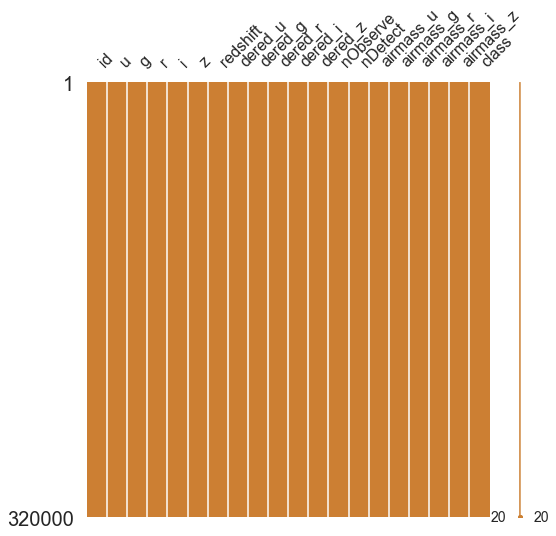

In [24]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

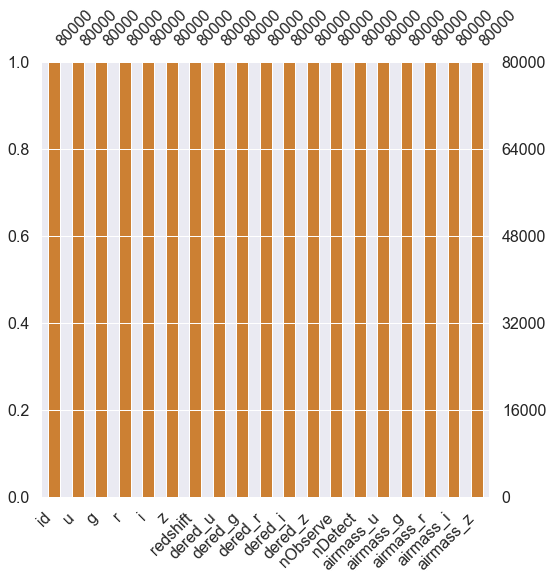

In [26]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

## 1.2 Target label 확인

- target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다.

- binary classification 문제의 경우에서, 1 과 0의 분호가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

- Multi-class classification에 대해서는 잘 모름. 공부 부족

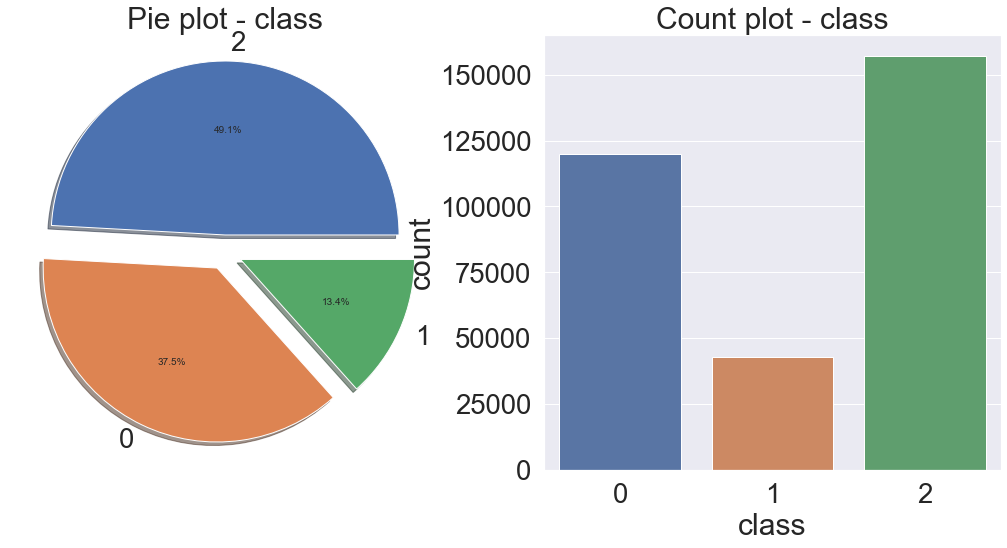

In [41]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['class'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - class')
ax[0].set_ylabel('')

sns.countplot('class', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - class')

plt.show()

# 2. Exploratory data analysis

- 이제 본격적으로 데이터 분석을 해보자. 데이터는 매우 많다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요하다.

- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편하다.

## 2.1 u